# Top-3 Prediction with a Test Image

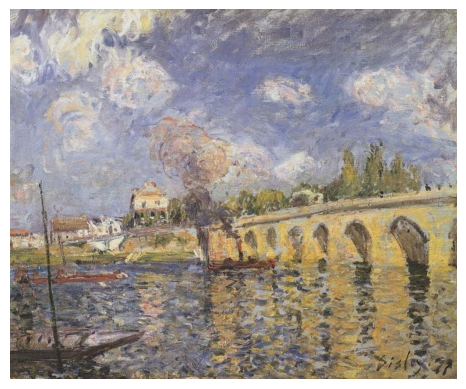

In [1]:
import cv2
import matplotlib.pyplot as plt

# Read the image using OpenCV
test_img = "C:/seven/test_img.jpg"
img = cv2.imread(test_img)

# Convert BGR image to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(img_rgb)
plt.axis('off')  
plt.show()

- Predict the above painting's style using the trained model 

In [2]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.applications.resnet_rs import preprocess_input
import tensorflow as tf
import numpy as np

# Load the model withouth Data Augmentation 
model = load_model('C:/seven/model_resnetrs50_lion_dense10240_noda.h5')

test_img = "C:/seven/test_img.jpg"

# Load and preprocess the image
img = load_img(test_img)
x = img_to_array(img)
x = tf.image.resize(x, [224, 224])  # Resize the image
x = np.array([x])  # Create a batch dimension
x = preprocess_input(x)  # Preprocess the image

# Make predictions using the loaded model
predict = model.predict(x)

# Create a dictionary of class indices and their corresponding labels
class_indices = {0: 'abstract_expressionism', 1: 'baroque', 2: 'cubism', 3: 'impressionism', 4: 'native_art_primitivism', 5: 'rococo', 6: 'surrealism'}

# Get the indices of the top 3 predictions with the highest probabilities
top_3_indices = np.argsort(predict[0])[-3:][::-1]

# Print class labels and corresponding probabilities for the top 3 predictions
for index in top_3_indices:
    class_label = class_indices[index]
    probability = predict[0][index] * 100
    print(f"{class_label} ({probability:.2f}%)")

1/1 [==============================] - 9s 9s/step
impressionism (100.00%)
cubism (0.00%)
native_art_primitivism (0.00%)
